In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.shape

(9800, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Missing value pada Postal Code diisi 0 karena kolom ini tidak digunakan dalam analisis numerik.

In [7]:
df['Postal Code'] = df['Postal Code'].fillna(0) #

In [8]:
df['Postal Code'] = df['Postal Code'].astype(str)

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Month_Year'] = df['Order Date'].dt.to_period('M')

df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

In [10]:
df[['Order Date','Ship Date','Year','Month','Shipping Duration']].head()
df['Shipping Duration'].describe()

count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping Duration, dtype: float64

In [11]:
df.groupby('Ship Mode')['Sales'].mean()

Ship Mode
First Class       230.228020
Same Day          232.749143
Second Class      236.547939
Standard Class    228.849856
Name: Sales, dtype: float64

In [12]:
df.groupby('Ship Mode')['Shipping Duration'].mean()

Ship Mode
First Class       2.179214
Same Day          0.044610
Second Class      3.249211
Standard Class    5.008363
Name: Shipping Duration, dtype: float64

In [13]:
# Cek hasil
df[['Order Date', 'Ship Date', 'Shipping Duration']].head()

,Order Date,Ship Date,Shipping Duration
0,2017-11-08,2017-11-11,3
1,2017-11-08,2017-11-11,3
2,2017-06-12,2017-06-16,4
3,2016-10-11,2016-10-18,7
4,2016-10-11,2016-10-18,7


### 1. Total Sales

All Revenue

In [14]:
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()

print("Total Sales:", total_sales)
print("Average Sales:", avg_sales)

Total Sales: 2261536.7827000003
Average Sales: 230.7690594591837


Rata-rata Sales per Order

In [15]:
sales_per_order = df.groupby('Order ID')['Sales'].sum()

average_sales_per_order = sales_per_order.mean()
average_sales_per_order

np.float64(459.4751691791955)

Median Sales per Order

In [16]:
median_sales_per_order = sales_per_order.median()
median_sales_per_order

151.875

### 2. SALES PER CATEGORY

Total Sales per Category

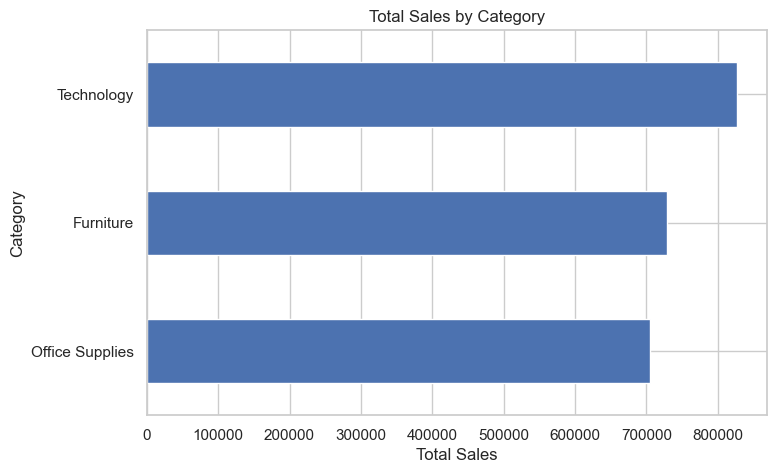

In [17]:
sales_category = df.groupby('Category')['Sales'].sum().sort_values()

plt.figure(figsize=(8,5))
sales_category.plot(kind='barh')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.savefig('sales_by_category.png', dpi=300)
plt.show()

Total Sales per Sub-Category

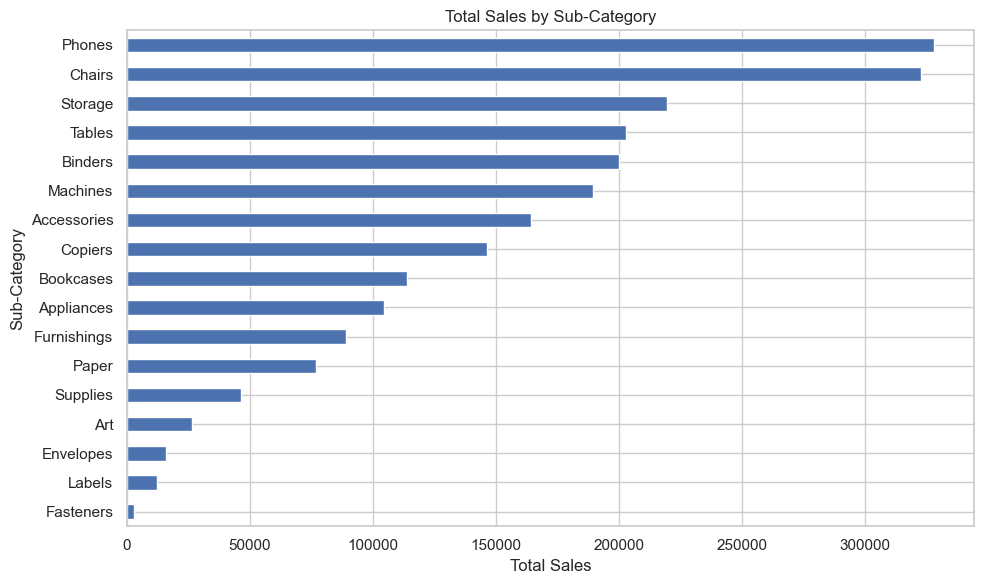

In [18]:
sales_subcategory = df.groupby('Sub-Category')['Sales'].sum().sort_values()

plt.figure(figsize=(10,6))
sales_subcategory.plot(kind='barh')

plt.title('Total Sales by Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

In [19]:
top_subcategory = sales_subcategory.idxmax()
print("Top Sub-Category:", top_subcategory)

Top Sub-Category: Phones


### 3. SALES PER REGION

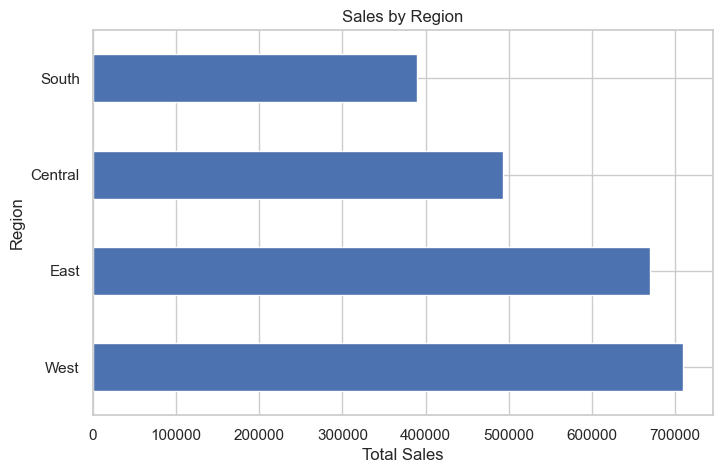

In [20]:
sales_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sales_region.plot(kind='barh')
plt.title('Sales by Region')
plt.xlabel('Total Sales')
plt.savefig('sales_by_region.png', dpi=300)
plt.show()

### 4. SALES PER SEGMENT

In [21]:
sales_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print(sales_segment)

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64


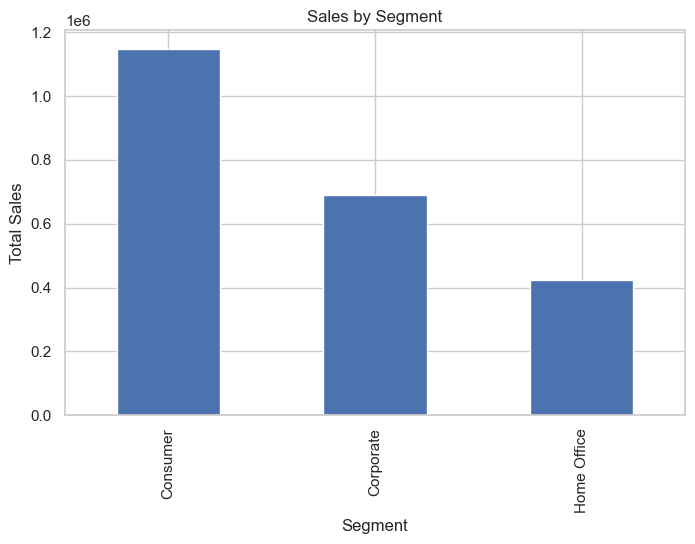

In [22]:
sales_segment.plot(kind='bar')
plt.title('Sales by Segment')
plt.ylabel('Total Sales')
plt.show()

### 5. SALES TREND OVER TIME

Sales per Year

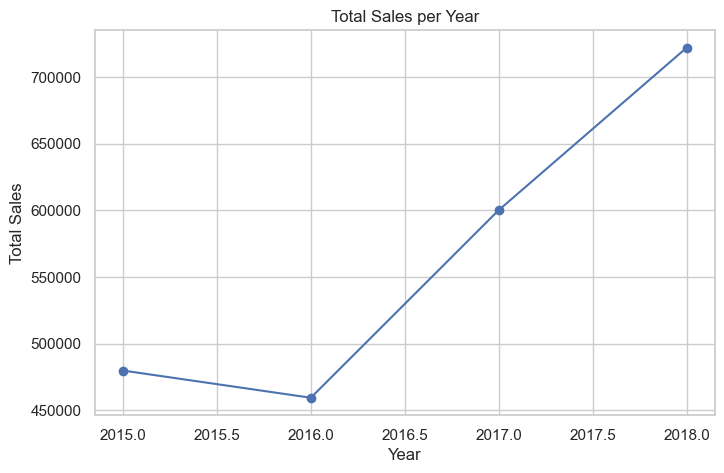

In [23]:
sales_year = df.groupby('Year')['Sales'].sum()

plt.figure(figsize=(8,5))
sales_year.plot(kind='line', marker='o')
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.savefig('sales_by_year.png', dpi=300)
plt.show()

Sales per Month (Gabungan Semua Tahun)

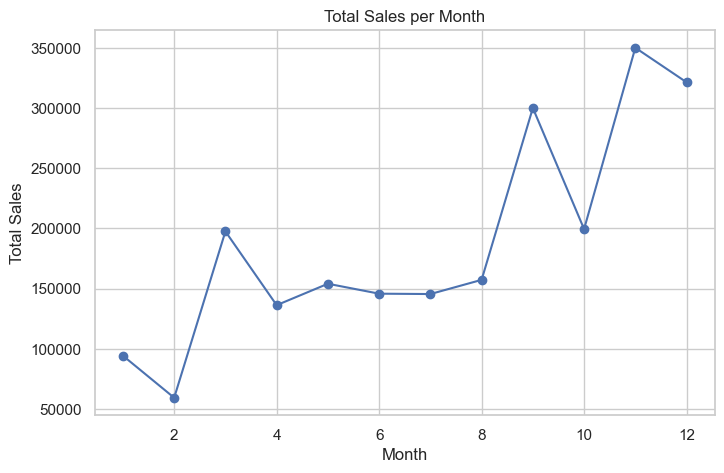

In [24]:
sales_month = df.groupby('Month')['Sales'].sum().sort_index()

plt.figure(figsize=(8,5))
sales_month.plot(kind='line', marker='o')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Sales per Month per Year (Untuk lihat seasonality)

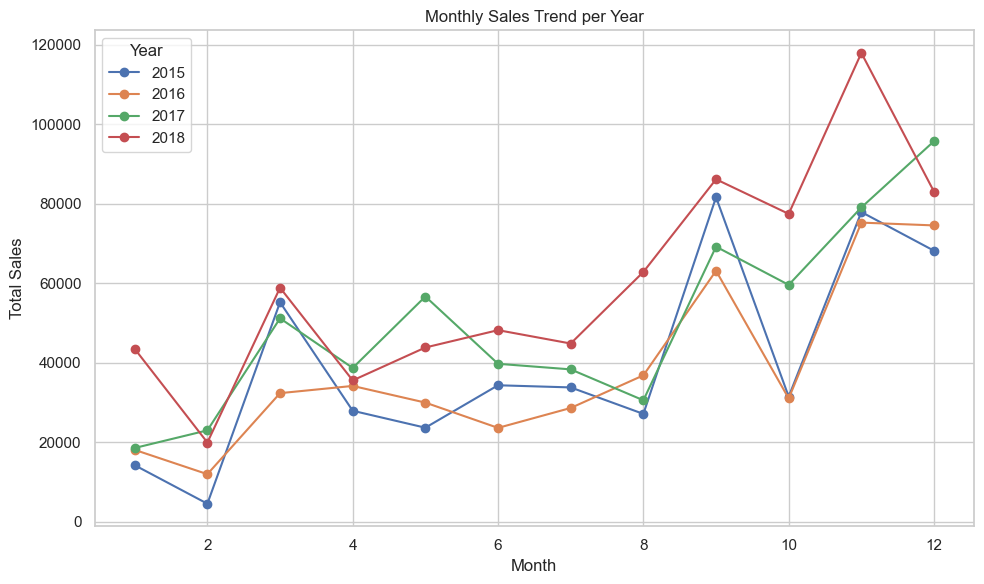

In [25]:
sales_year_month = df.groupby(['Year','Month'])['Sales'].sum().unstack()

plt.figure(figsize=(10,6))

for year in sales_year_month.index:
    plt.plot(sales_year_month.columns,
             sales_year_month.loc[year],
             marker='o',
             label=year)

plt.title('Monthly Sales Trend per Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_seasonality.png', dpi=300)
plt.show()

### 6. Shipping Duration Distribution

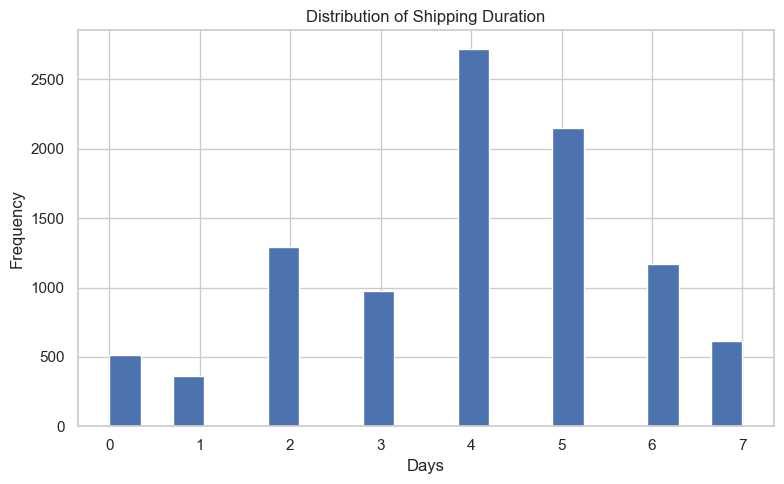

In [26]:
plt.figure(figsize=(8,5))
plt.hist(df['Shipping Duration'], bins=20)
plt.title('Distribution of Shipping Duration')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('shipping_duration.png', dpi=300)
plt.show()

### Cek Apakah Q4 Lebih Tinggi?

In [27]:
q4_sales = df[df['Month'].isin([10,11,12])]['Sales'].sum()
total_sales = df['Sales'].sum()

q4_percentage = (q4_sales / total_sales) * 100
print("Q4 Contribution:", round(q4_percentage,2), "%")

Q4 Contribution: 38.52 %


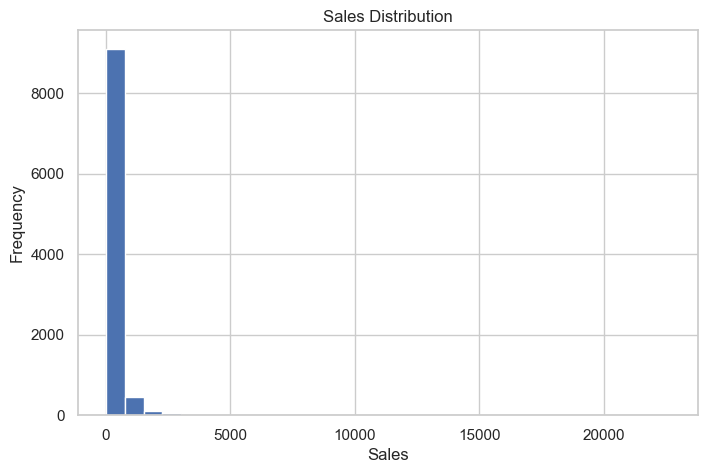

In [28]:
df['Sales'].plot(kind='hist', bins=30)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [29]:
df['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [30]:
# Category Contribution
category_contribution = (
    df.groupby('Category')['Sales'].sum() /
    df['Sales'].sum()
) * 100

# Shipping Duration per Region
shipping_region = df.groupby('Region')['Shipping Duration'].mean().sort_values()

# Fastest & Slowest Region
fastest_region = shipping_region.idxmin()
slowest_region = shipping_region.idxmax()

# Average Shipping Duration
avg_shipping = round(df['Shipping Duration'].mean(), 2)

print("Category Contribution (%):")
print(category_contribution)
print("\nAverage Shipping Duration:", avg_shipping, "days")
print("\nFastest Shipping Region:", fastest_region)
print("Slowest Shipping Region:", slowest_region)

Category Contribution (%):
Category
Furniture          32.219621
Office Supplies    31.192167
Technology         36.588212
Name: Sales, dtype: float64

Average Shipping Duration: 3.96 days

Fastest Shipping Region: East
Slowest Shipping Region: Central


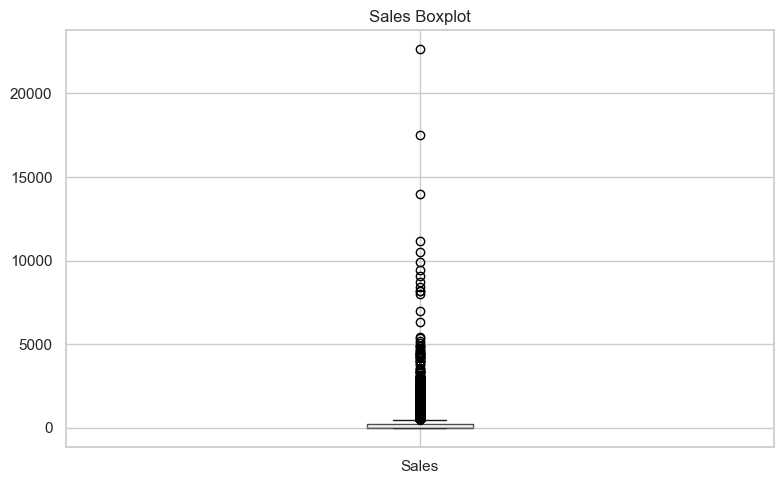

In [31]:
df.boxplot(column='Sales')
plt.title('Sales Boxplot')
plt.tight_layout()
plt.savefig('sales_boxplot.png', dpi=300)

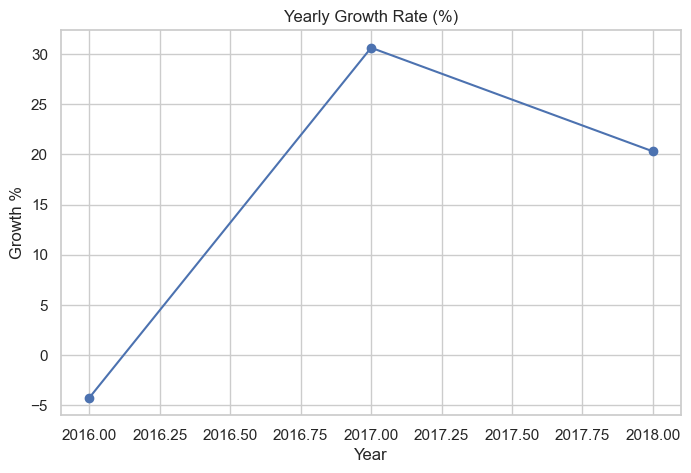

In [32]:
growth = sales_year.pct_change() * 100

plt.figure(figsize=(8,5))
growth.plot(marker='o')
plt.title("Yearly Growth Rate (%)")
plt.xlabel("Year")
plt.ylabel("Growth %")
plt.grid(True)
plt.savefig('yearly_growth.png', dpi=300)
plt.show()

### Final Business Insight

**1. Technology is the Primary Revenue Driver**

Kategori Technology memberikan kontribusi terbesar terhadap total revenue perusahaan.
Hal ini menunjukkan demand tinggi pada produk teknologi dan menjadi fokus utama pertumbuhan bisnis.

Recommendation:
Perusahaan dapat mempertahankan stok optimal dan strategi promosi pada kategori ini untuk menjaga revenue stability.

**2. West Region Generates Highest Sales**

Region West mencatat penjualan tertinggi dibandingkan region lain.

Namun perlu dianalisis apakah region lain tertinggal karena:

Demand rendah

Distribusi kurang optimal

Strategi marketing belum maksimal

Recommendation:
Evaluasi strategi marketing di Central dan South untuk meningkatkan penetrasi pasar.

**3. Strong Q4 Seasonality**

Penjualan meningkat signifikan pada bulan Oktober–Desember (Q4).

Kemungkinan dipengaruhi oleh:

Holiday season

Year-end corporate purchasing

Promotional events

Recommendation:
Perusahaan dapat meningkatkan inventory dan marketing budget menjelang Q4 untuk memaksimalkan revenue spike.

**4. Average Shipping Duration ≈ 4 Days**

Rata-rata waktu pengiriman sekitar 4 hari.
Beberapa region memiliki waktu pengiriman lebih lambat.

Semakin lama shipping duration:

Perputaran uang melambat

Risiko cashflow terganggu

Recommendation:
Optimasi logistik terutama di region dengan durasi terlama untuk mempercepat cash cycle.